# Hydrogen atom

In [13]:
import numpy as np
import plotly.graph_objects as go
from scipy.linalg import eigh
import scipy.constants as const
from scipy import sparse
from scipy.sparse.linalg import eigsh

In [14]:
# Constants
hbar = const.hbar
mass = const.electron_mass

L = 50e-9  # Domain size
N = 10  # Number of grid points
x = np.linspace(L/200, L, N)
y = np.linspace(L/200, L, N)
z = np.linspace(L/200, L, N)
X, Y, Z = np.meshgrid(x, y, z)

def potential(x, y, z, atomic_no):
    qe = const.elementary_charge
    return atomic_no*qe**2/(4*np.pi*const.epsilon_0*(x**2 + y**2 + z**2)**0.5)

Vxyz = potential(X, Y, Z, 1)
dx = x[1] - x[0]
dy = y[1] - y[0]
dz = z[1] - z[0]

In [15]:
diags = np.array([np.ones(N), -2*np.ones(N), np.ones(N)])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T_x = -hbar**2/(2*mass) * (1/dx**2) * D
T_y = -hbar**2/(2*mass) * (1/dx**2) * D
T_z = -hbar**2/(2*mass) * (1/dx**2) * D
T = (sparse.kron(sparse.kron(np.eye(N), T_x), np.eye(N)) + 
        sparse.kron(sparse.kron(np.eye(N), sparse.eye(N)), T_y) + 
        sparse.kron(sparse.kron(T_z, np.eye(N)), np.eye(N)))

V = sparse.diags(Vxyz.flatten(), 0)
H = T + V
eigenvals, eigenvecsT = eigsh(H, k=50, which='SM')

In [16]:
excited_state_index = 0  # INPUT

excited_state = eigenvecsT[:, excited_state_index].reshape(N, N, N)
energy_eigenvalue = eigenvals[excited_state_index]
probability_density = np.real(excited_state.conjugate() * excited_state)

Eigenfunction

In [17]:
# Create 3D isosurface plot for the wavefunction
isovalue = np.abs(excited_state).max() * 0.6
fig1 = go.Figure(data=go.Isosurface(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=excited_state.flatten(),
    isomin=-isovalue,
    isomax=isovalue,
    opacity=0.4, # CHANGE
    surface_count=2,
    colorscale='Viridis'
))

fig1.update_layout(
                title=f'Excited State Isosurface Plot (State {excited_state_index}) - Energy: {energy_eigenvalue:.4f}',
                scene=dict(xaxis_title='x', yaxis_title='y', zaxis_title='z'))

# Show the Plotly plot
fig1.show()

probability density

In [18]:
# Create an isosurface plot for the probability density
fig2 = go.Figure(data=go.Isosurface(x=X.flatten(), y=Y.flatten(), z=Z.flatten(), 
                                value=probability_density.flatten(),
                                isomin=0, isomax=probability_density.max(), opacity=0.3, # CHANGE
                                surface_count=30, colorscale='tealrose', 
                                colorbar=dict(title='Probability Density')))

fig2.update_layout(
                title=f'Probability Density (Isosurface Plot) - State {excited_state_index}, Energy: {energy_eigenvalue:.4}',
                scene=dict(xaxis_title='x', yaxis_title='y', zaxis_title='z'))

# Show the Plotly plot for probability density in isosurface plot form
fig2.show()


## Radial part solution
$$ \frac{d^2R}{dr^2} -\frac{2}{r} \frac{dR}{dr} + \frac{2m}{\hbar^2} (E-V(r)) R(r) = 0 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import scipy.constants as const
from scipy import sparse
from scipy.sparse.linalg import eigsh

In [17]:
hcut = 0.1
mass = 1
k = 0.2

# hcut = const.hbar
# mass = const.electron_mass
# k = const.elementary_charge**2/(4*const.pi*const.epsilon_0)

V = lambda r: k/r

N = 500
r = np.linspace(1e-6, 4, N)
# r = np.linspace(1e-17, 0.5e-9, N)

# plt.plot(r, V(r))
dr = r[1] - r[0]

D1 = (np.diag(np.ones(N-1), 1) -np.diag(np.ones(N)))/dr
D2 = (np.diag(np.ones(N-1),1) -2*np.diag(np.ones(N)) +np.diag(np.ones(N-1),-1))/dr**2
H1 = -hcut**2/(2*mass) * (D2 -2*D1/r) + np.diag(V(r)*np.ones(N))
eigenvals, eigenvecsT = eigh(H1)

# D1diags = np.array([-np.ones(N), np.ones(N)])
# D1 = sparse.spdiags(D1diags, np.array([0,1]), N, N)/dr
# D2diags = np.array([np.ones(N), -2*np.ones(N), np.ones(N)])
# D2 = sparse.spdiags(D2diags, np.array([-1,0,1]), N, N)/dr**2
# H1 = -hcut**2/(2*mass) * (D2 -2*D1/r) + sparse.diags(V(r), 0)
# eigenvals, eigenvecsT = eigsh(H1, k=50, which='SM')

def eig_val(n):
    return eigenvals[n]
def eig_vec(n):
    eigf = eigenvecsT[:, n]
    eigf = eigf/np.sum(np.abs(eigf)**2*dr)**0.5
    return eigf
def prob_den(n):
    igv = eigenvals[n]
    eigf = eigenvecsT[:, n]
    eigf = eigf/np.sum(np.abs(eigf)**2*dr)**0.5
    return eigf.conjugate()*eigf


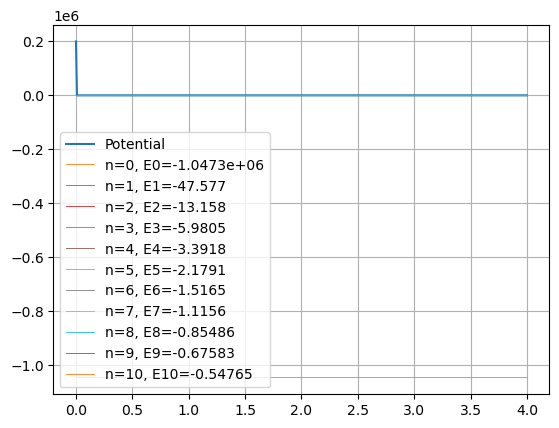

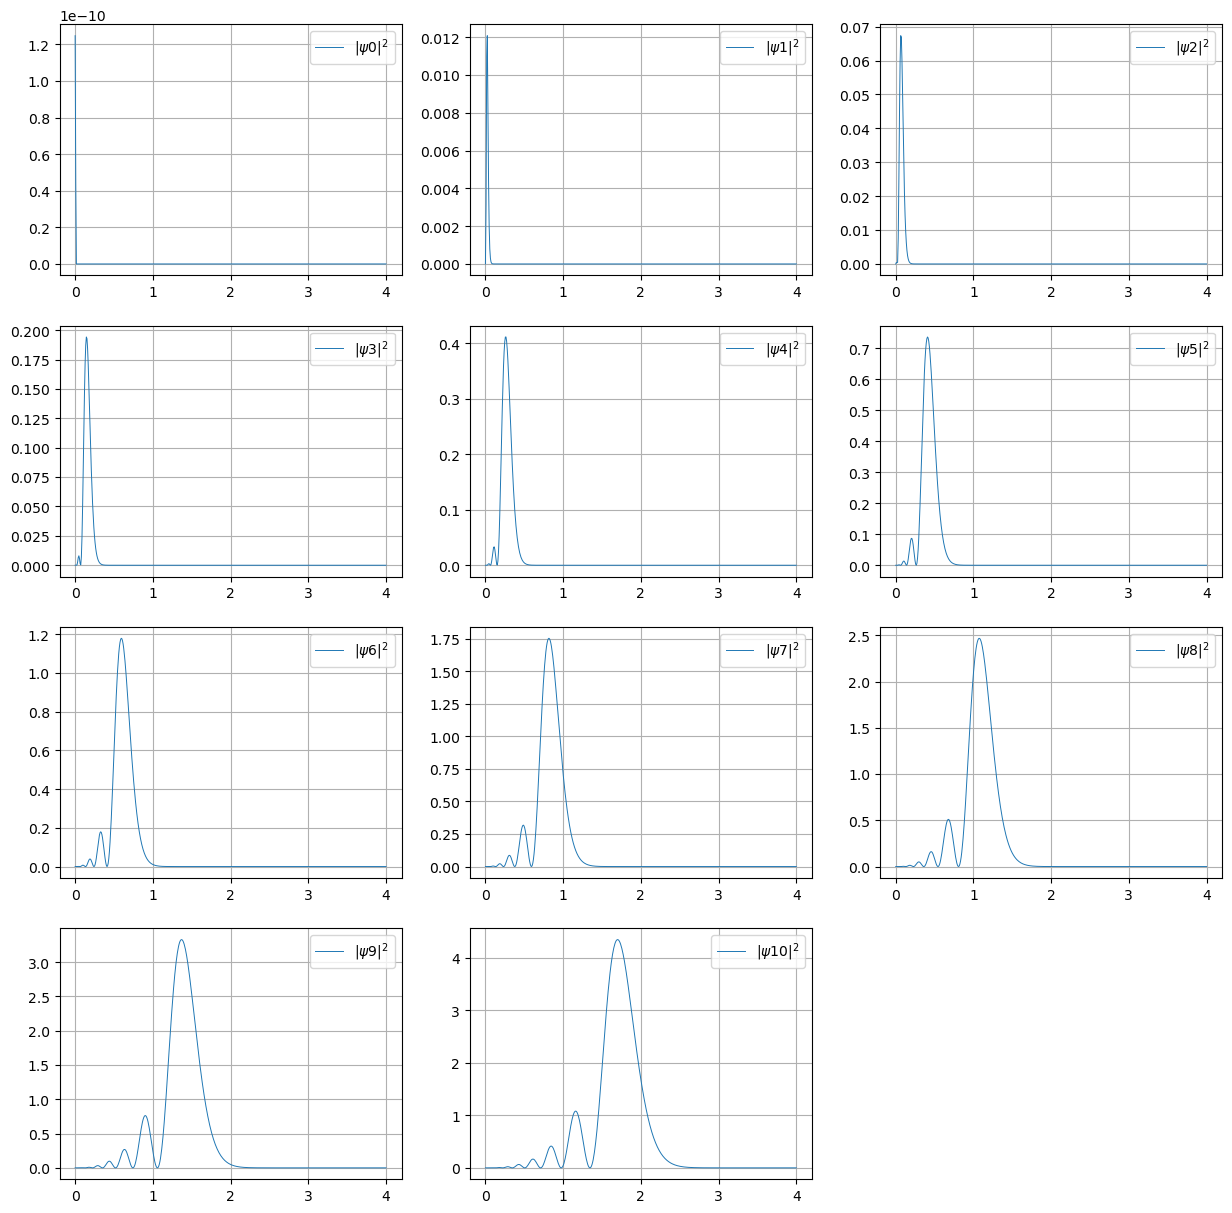

In [18]:
nmin, nmax = 0, 10  # INPUT

plt.plot(r, V(r), label='Potential')
for i in range(nmin, nmax+1):
    plt.plot(r, eig_val(i)*np.ones(N), label=f'n={i}, E{i}={eig_val(i):.5}', lw=0.6)
plt.legend(loc='best')
plt.grid()
plt.show()

plt.figure(figsize=(15, 15)) # INPUT
for i in range(nmin, nmax+1):
    plt.subplot((nmax+1-nmin)//3 +1, 3, i-nmin+1)
    # plt.plot(r, r*eig_vec(i), label=f'$\psi {i}$', lw=0.7) # for wavefunction
    plt.plot(r, r**2*prob_den(i), label=f'$|\psi {i}|^2$', lw=0.7) # for probability density
    plt.legend(loc='best')
    plt.grid()
plt.show()

In [19]:
for i in range(10):
    print(f'E{i} = {eig_val(i)/const.electron_volt}')

E0 = -6.537011398914592e+24
E1 = -2.969507246087628e+20
E2 = -8.212435168044545e+19
E3 = -3.732706369890402e+19
E4 = -2.116966026938066e+19
E5 = -1.3601169249869365e+19
E6 = -9.465345917474632e+18
E7 = -6.963098267467761e+18
E8 = -5.335599850921453e+18
E9 = -4.218216780897857e+18
